In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

0.0


In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
x = df.copy()
y = x.pop('target')

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [10]:
from sklearn.metrics import accuracy_score

## logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


## Navie bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [14]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


## Support Vector Machine

In [15]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [16]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [18]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


## XG Boost

In [19]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:07:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [20]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


## Neural Network

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                154       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 12        
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test),epochs=200, batch_size=10)

Epoch 1/200
82/82 [==============================] - 2s 8ms/step - loss: 1.5114 - accuracy: 0.5098 - val_loss: 0.6451 - val_accuracy: 0.6488
Epoch 2/200
82/82 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.6146 - val_loss: 0.6209 - val_accuracy: 0.7366
Epoch 3/200
82/82 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6720 - val_loss: 0.5892 - val_accuracy: 0.7659
Epoch 4/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.6841 - val_loss: 0.5730 - val_accuracy: 0.7463
Epoch 5/200
82/82 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.6805 - val_loss: 0.5499 - val_accuracy: 0.7512
Epoch 6/200
82/82 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.6976 - val_loss: 0.5422 - val_accuracy: 0.7707
Epoch 7/200
82/82 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.6902 - val_loss: 0.5539 - val_accuracy: 0.7317
Epoch 8/200
8

Epoch 59/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8244 - val_loss: 0.3360 - val_accuracy: 0.8439
Epoch 60/200
82/82 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8293 - val_loss: 0.3283 - val_accuracy: 0.8634
Epoch 61/200
82/82 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8280 - val_loss: 0.3291 - val_accuracy: 0.8634
Epoch 62/200
82/82 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8317 - val_loss: 0.3434 - val_accuracy: 0.8488
Epoch 63/200
82/82 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8354 - val_loss: 0.3617 - val_accuracy: 0.8244
Epoch 64/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8402 - val_loss: 0.3254 - val_accuracy: 0.8683
Epoch 65/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.8329 - val_loss: 0.3307 - val_accuracy: 0.8439
Epoch 

82/82 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8476 - val_loss: 0.3130 - val_accuracy: 0.8732
Epoch 117/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3664 - accuracy: 0.8524 - val_loss: 0.3127 - val_accuracy: 0.8732
Epoch 118/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3670 - accuracy: 0.8476 - val_loss: 0.3272 - val_accuracy: 0.8439
Epoch 119/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8537 - val_loss: 0.3128 - val_accuracy: 0.8732
Epoch 120/200
82/82 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8451 - val_loss: 0.3298 - val_accuracy: 0.8439
Epoch 121/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8549 - val_loss: 0.3373 - val_accuracy: 0.8439
Epoch 122/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 0.8488 - val_loss: 0.3453 - val_accuracy: 0.8683
Epoch 123/200

82/82 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8500 - val_loss: 0.3088 - val_accuracy: 0.8780
Epoch 174/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8451 - val_loss: 0.3090 - val_accuracy: 0.8683
Epoch 175/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8500 - val_loss: 0.3089 - val_accuracy: 0.8829
Epoch 176/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8476 - val_loss: 0.3105 - val_accuracy: 0.8585
Epoch 177/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3665 - accuracy: 0.8463 - val_loss: 0.3151 - val_accuracy: 0.8537
Epoch 178/200
82/82 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8476 - val_loss: 0.3115 - val_accuracy: 0.8585
Epoch 179/200
82/82 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8427 - val_loss: 0.3095 - val_accuracy: 0.8829
Epoch 180/200

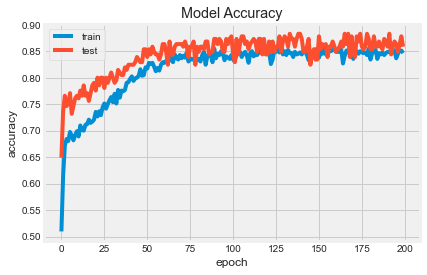

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

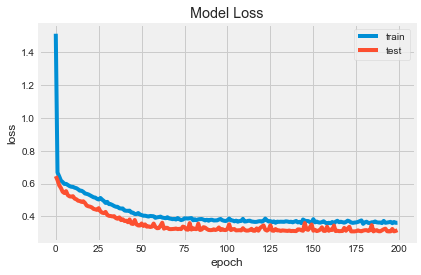

In [27]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [28]:
Y_pred_nn = model.predict(X_test)

In [29]:
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

In [30]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 85.85 %


### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Convolutional Neural Metwork

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.0


In [33]:
X_train.shape

(820, 13)

In [34]:
X_test.shape

(205, 13)

In [35]:
x_train = X_train.reshape(820,13,1)
x_test = X_test.reshape(205,13,1)

In [36]:
epochs = 100
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(13,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 32)           

In [38]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005),metrics=['accuracy'])

C:\Users\ANKIT\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [39]:
hists = model.fit(x_train, Y_train,validation_data=(x_test, Y_test), epochs=200, verbose=1)

Epoch 1/200
26/26 [==============================] - 4s 32ms/step - loss: 1.1703 - accuracy: 0.5012 - val_loss: 0.6894 - val_accuracy: 0.4878
Epoch 2/200
26/26 [==============================] - 0s 11ms/step - loss: 1.2085 - accuracy: 0.4963 - val_loss: 0.6915 - val_accuracy: 0.4488
Epoch 3/200
26/26 [==============================] - 0s 11ms/step - loss: 1.1809 - accuracy: 0.5049 - val_loss: 0.6941 - val_accuracy: 0.4683
Epoch 4/200
26/26 [==============================] - 0s 10ms/step - loss: 1.1635 - accuracy: 0.4927 - val_loss: 0.6929 - val_accuracy: 0.4683
Epoch 5/200
26/26 [==============================] - 0s 11ms/step - loss: 1.0004 - accuracy: 0.5439 - val_loss: 0.6888 - val_accuracy: 0.4927
Epoch 6/200
26/26 [==============================] - 0s 11ms/step - loss: 0.9779 - accuracy: 0.5415 - val_loss: 0.6827 - val_accuracy: 0.4780
Epoch 7/200
26/26 [==============================] - 0s 11ms/step - loss: 0.9770 - accuracy: 0.5744 - val_loss: 0.6717 - val_accuracy: 0.5024
Epoch 

26/26 [==============================] - 0s 11ms/step - loss: 0.6411 - accuracy: 0.7366 - val_loss: 0.3189 - val_accuracy: 0.8683
Epoch 59/200
26/26 [==============================] - 0s 10ms/step - loss: 0.6280 - accuracy: 0.7207 - val_loss: 0.3182 - val_accuracy: 0.8683
Epoch 60/200
26/26 [==============================] - 0s 11ms/step - loss: 0.5908 - accuracy: 0.7171 - val_loss: 0.3171 - val_accuracy: 0.8732
Epoch 61/200
26/26 [==============================] - 0s 11ms/step - loss: 0.6127 - accuracy: 0.7366 - val_loss: 0.3161 - val_accuracy: 0.8732
Epoch 62/200
26/26 [==============================] - 0s 11ms/step - loss: 0.5648 - accuracy: 0.7378 - val_loss: 0.3161 - val_accuracy: 0.8683
Epoch 63/200
26/26 [==============================] - 0s 11ms/step - loss: 0.6332 - accuracy: 0.7305 - val_loss: 0.3158 - val_accuracy: 0.8683
Epoch 64/200
26/26 [==============================] - 0s 10ms/step - loss: 0.5936 - accuracy: 0.7512 - val_loss: 0.3149 - val_accuracy: 0.8683
Epoch 65/200

26/26 [==============================] - 0s 10ms/step - loss: 0.4669 - accuracy: 0.7780 - val_loss: 0.2878 - val_accuracy: 0.8976
Epoch 116/200
26/26 [==============================] - 0s 10ms/step - loss: 0.5203 - accuracy: 0.7683 - val_loss: 0.2877 - val_accuracy: 0.8976
Epoch 117/200
26/26 [==============================] - 0s 10ms/step - loss: 0.5038 - accuracy: 0.7768 - val_loss: 0.2870 - val_accuracy: 0.8976
Epoch 118/200
26/26 [==============================] - 0s 10ms/step - loss: 0.5036 - accuracy: 0.7744 - val_loss: 0.2870 - val_accuracy: 0.9024
Epoch 119/200
26/26 [==============================] - 0s 10ms/step - loss: 0.5065 - accuracy: 0.7780 - val_loss: 0.2867 - val_accuracy: 0.9073
Epoch 120/200
26/26 [==============================] - 0s 10ms/step - loss: 0.4802 - accuracy: 0.7768 - val_loss: 0.2860 - val_accuracy: 0.9073
Epoch 121/200
26/26 [==============================] - 0s 10ms/step - loss: 0.5254 - accuracy: 0.7707 - val_loss: 0.2858 - val_accuracy: 0.9073
Epoch 

26/26 [==============================] - 0s 10ms/step - loss: 0.4639 - accuracy: 0.7927 - val_loss: 0.2752 - val_accuracy: 0.9073
Epoch 173/200
26/26 [==============================] - 0s 10ms/step - loss: 0.4581 - accuracy: 0.7902 - val_loss: 0.2751 - val_accuracy: 0.8976
Epoch 174/200
26/26 [==============================] - 0s 10ms/step - loss: 0.4661 - accuracy: 0.7951 - val_loss: 0.2748 - val_accuracy: 0.8976
Epoch 175/200
26/26 [==============================] - 0s 10ms/step - loss: 0.4371 - accuracy: 0.8195 - val_loss: 0.2744 - val_accuracy: 0.8976
Epoch 176/200
26/26 [==============================] - 0s 10ms/step - loss: 0.4492 - accuracy: 0.8207 - val_loss: 0.2746 - val_accuracy: 0.8976
Epoch 177/200
26/26 [==============================] - 0s 11ms/step - loss: 0.4718 - accuracy: 0.7829 - val_loss: 0.2747 - val_accuracy: 0.8976
Epoch 178/200
26/26 [==============================] - 0s 10ms/step - loss: 0.4729 - accuracy: 0.8000 - val_loss: 0.2746 - val_accuracy: 0.8976
Epoch 

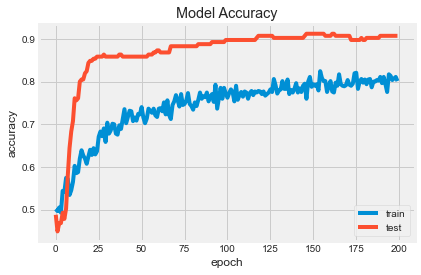

In [40]:
# Model accuracy
plt.plot(hists.history['accuracy'])
plt.plot(hists.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

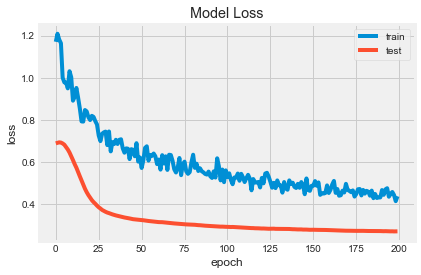

In [42]:
# Model Losss
plt.plot(hists.history['loss'])
plt.plot(hists.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [43]:
# Predicting the Test set results
y_pred_cnn = model.predict(x_test)

In [44]:
rounded = [round(x[0]) for x in y_pred_cnn]
Y_pred_cnn = rounded

In [45]:
score_cnn = round(accuracy_score(Y_pred_cnn,Y_test)*100,2)

print("The accuracy score achieved using artificial Neural Network is: "+str(score_cnn)+" %")

The accuracy score achieved using artificial Neural Network is: 90.73 %


## Artificial Neural Network

In [46]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [47]:
# Intinialising the ANN
classifier = Sequential()

# Adding the input layer and the first Hidden layer 
classifier.add(Dense(activation="relu", input_dim=13, units=7, kernel_initializer="uniform"))

# Adding the output layer 
classifier.add(Dense(activation="sigmoid", input_dim=13, units=1, kernel_initializer="uniform"))

In [48]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the training set
hist = classifier.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=10, epochs=500)

Epoch 1/500
82/82 [==============================] - 1s 6ms/step - loss: 0.6768 - accuracy: 0.7585 - val_loss: 0.6370 - val_accuracy: 0.8488
Epoch 2/500
82/82 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.8439 - val_loss: 0.5074 - val_accuracy: 0.8683
Epoch 3/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.8476 - val_loss: 0.4123 - val_accuracy: 0.8780
Epoch 4/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.8476 - val_loss: 0.3612 - val_accuracy: 0.8780
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8537 - val_loss: 0.3354 - val_accuracy: 0.8878
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8537 - val_loss: 0.3234 - val_accuracy: 0.8829
Epoch 7/500
82/82 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8500 - val_loss: 0.3164 - val_accuracy: 0.8829
Epoch 8/500
8

Epoch 59/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8841 - val_loss: 0.2735 - val_accuracy: 0.9024
Epoch 60/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8866 - val_loss: 0.2726 - val_accuracy: 0.9024
Epoch 61/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.8841 - val_loss: 0.2725 - val_accuracy: 0.9024
Epoch 62/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8878 - val_loss: 0.2725 - val_accuracy: 0.9024
Epoch 63/500
82/82 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.8866 - val_loss: 0.2710 - val_accuracy: 0.9024
Epoch 64/500
82/82 [==============================] - 0s 3ms/step - loss: 0.3002 - accuracy: 0.8829 - val_loss: 0.2699 - val_accuracy: 0.9024
Epoch 65/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8817 - val_loss: 0.2697 - val_accuracy: 0.9024
Epoch 

82/82 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.9171 - val_loss: 0.2248 - val_accuracy: 0.9317
Epoch 117/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.9195 - val_loss: 0.2238 - val_accuracy: 0.9317
Epoch 118/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.9171 - val_loss: 0.2225 - val_accuracy: 0.9366
Epoch 119/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.9183 - val_loss: 0.2215 - val_accuracy: 0.9317
Epoch 120/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2440 - accuracy: 0.9195 - val_loss: 0.2204 - val_accuracy: 0.9366
Epoch 121/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9207 - val_loss: 0.2191 - val_accuracy: 0.9366
Epoch 122/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9171 - val_loss: 0.2179 - val_accuracy: 0.9366
Epoch 123/500

82/82 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9329 - val_loss: 0.1755 - val_accuracy: 0.9415
Epoch 174/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9329 - val_loss: 0.1749 - val_accuracy: 0.9415
Epoch 175/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9317 - val_loss: 0.1743 - val_accuracy: 0.9415
Epoch 176/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2053 - accuracy: 0.9354 - val_loss: 0.1747 - val_accuracy: 0.9415
Epoch 177/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9329 - val_loss: 0.1739 - val_accuracy: 0.9415
Epoch 178/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9329 - val_loss: 0.1724 - val_accuracy: 0.9415
Epoch 179/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.9329 - val_loss: 0.1716 - val_accuracy: 0.9415
Epoch 180/500

82/82 [==============================] - 0s 3ms/step - loss: 0.1752 - accuracy: 0.9317 - val_loss: 0.1401 - val_accuracy: 0.9512
Epoch 231/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1745 - accuracy: 0.9317 - val_loss: 0.1405 - val_accuracy: 0.9512
Epoch 232/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1745 - accuracy: 0.9305 - val_loss: 0.1398 - val_accuracy: 0.9561
Epoch 233/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9329 - val_loss: 0.1391 - val_accuracy: 0.9561
Epoch 234/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.9329 - val_loss: 0.1379 - val_accuracy: 0.9463
Epoch 235/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.9329 - val_loss: 0.1360 - val_accuracy: 0.9610
Epoch 236/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1714 - accuracy: 0.9354 - val_loss: 0.1367 - val_accuracy: 0.9463
Epoch 237/500

82/82 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9488 - val_loss: 0.1127 - val_accuracy: 0.9756
Epoch 288/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1484 - accuracy: 0.9512 - val_loss: 0.1129 - val_accuracy: 0.9756
Epoch 289/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1483 - accuracy: 0.9512 - val_loss: 0.1141 - val_accuracy: 0.9707
Epoch 290/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9500 - val_loss: 0.1126 - val_accuracy: 0.9756
Epoch 291/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9500 - val_loss: 0.1136 - val_accuracy: 0.9756
Epoch 292/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9524 - val_loss: 0.1123 - val_accuracy: 0.9756
Epoch 293/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9500 - val_loss: 0.1116 - val_accuracy: 0.9756
Epoch 294/500

82/82 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9561 - val_loss: 0.0992 - val_accuracy: 0.9756
Epoch 345/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9549 - val_loss: 0.0995 - val_accuracy: 0.9756
Epoch 346/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9549 - val_loss: 0.0997 - val_accuracy: 0.9756
Epoch 347/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9561 - val_loss: 0.0987 - val_accuracy: 0.9756
Epoch 348/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9561 - val_loss: 0.0989 - val_accuracy: 0.9756
Epoch 349/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1336 - accuracy: 0.9561 - val_loss: 0.0999 - val_accuracy: 0.9756
Epoch 350/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9537 - val_loss: 0.0990 - val_accuracy: 0.9756
Epoch 351/500

82/82 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9573 - val_loss: 0.0910 - val_accuracy: 0.9805
Epoch 402/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9573 - val_loss: 0.0916 - val_accuracy: 0.9756
Epoch 403/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9549 - val_loss: 0.0917 - val_accuracy: 0.9756
Epoch 404/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9561 - val_loss: 0.0910 - val_accuracy: 0.9756
Epoch 405/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9573 - val_loss: 0.0900 - val_accuracy: 0.9756
Epoch 406/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9573 - val_loss: 0.0907 - val_accuracy: 0.9756
Epoch 407/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9610 - val_loss: 0.0923 - val_accuracy: 0.9756
Epoch 408/500

82/82 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9598 - val_loss: 0.0855 - val_accuracy: 0.9805
Epoch 459/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.9585 - val_loss: 0.0841 - val_accuracy: 0.9805
Epoch 460/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9573 - val_loss: 0.0854 - val_accuracy: 0.9805
Epoch 461/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9585 - val_loss: 0.0852 - val_accuracy: 0.9805
Epoch 462/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1176 - accuracy: 0.9573 - val_loss: 0.0847 - val_accuracy: 0.9805
Epoch 463/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9561 - val_loss: 0.0851 - val_accuracy: 0.9805
Epoch 464/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9549 - val_loss: 0.0846 - val_accuracy: 0.9756
Epoch 465/500

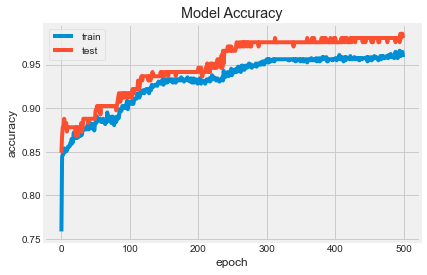

In [49]:
# Model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

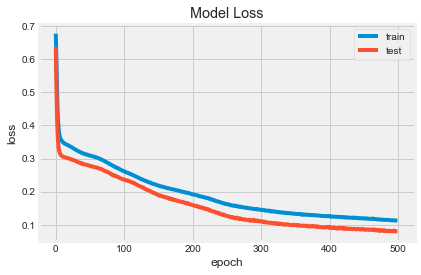

In [50]:
# Model Losss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [51]:
# Predicting the Test set results
y_pred_ann = classifier.predict(X_test)

In [52]:
rounded = [round(x[0]) for x in y_pred_ann]
Y_pred_ann = rounded

In [53]:
score_ann = round(accuracy_score(Y_pred_ann,Y_test)*100,2)

print("The accuracy score achieved using artificial Neural Network is: "+str(score_ann)+" %")

The accuracy score achieved using artificial Neural Network is: 98.05 %


## model with best score

In [54]:
scores = [score_lr,score_nb,score_svm,score_knn,score_xgb,score_nn,score_ann,score_cnn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","XGBoost","Neural Network","Art. Neural Network","Conv. Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Neural Network is: 85.85 %
The accuracy score achieved using Art. Neural Network is: 98.05 %
The accuracy score achieved using Conv. Neural Network is: 90.73 %


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

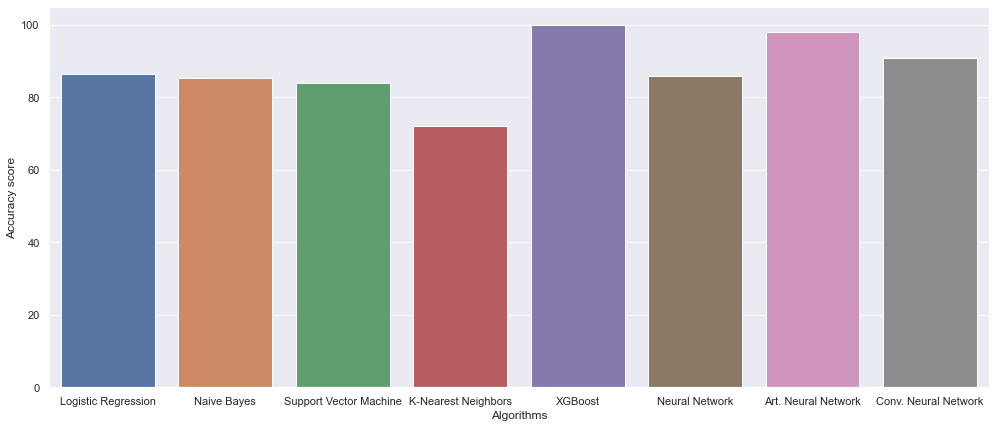

In [55]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## The accuracy score achieved using XG Boost is: 100 % this model is most accurate model of all the model trained in this datasets

### Save Best Model

In [57]:
import pickle

In [58]:
pickle.dump(xgb_model, open("HeartDiseasePrediction.pkl", "wb"))

### Load Model again

In [59]:
loaded_model = pickle.load(open("HeartDiseasePrediction.pkl", "rb"))